# WINE QUALITY PREDICTION

**Fixed acidity:** are non-volatile acids that do not evaporate.

**Volatile acidity:** are high acetic acid in wine which leads to an unpleasant vinegar taste.

**Citric Acid:** acts as a preservative to increase acidity.

**Residual sugar:** is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between — sweetness and sourness (wines > 45g/ltrs are sweet).

**Alcohol:** the amount of alcohol in wine.

**Residual sugar:** is the amount of sugar remaining after fermentation stops.

**Density:** sweeter wines have a higher density.

**Chlorides:** the amount of salt in the wine.

**Volatile acidity:** are high acetic acid in wine which leads to an unpleasant vinegar taste.

Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant -Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine.


## 1. Loading Libraries and Analyzing Data

In [1]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import mutual_info_regression
from sklearn import preprocessing

In [2]:
wine = pd.read_csv("wineQT.csv")

In [3]:
wine



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
wine.isnull().sum() #checking for null values and removing it.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
wine.dropna(inplace=True) #inplace is used to make changes in original data.

In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'Id'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

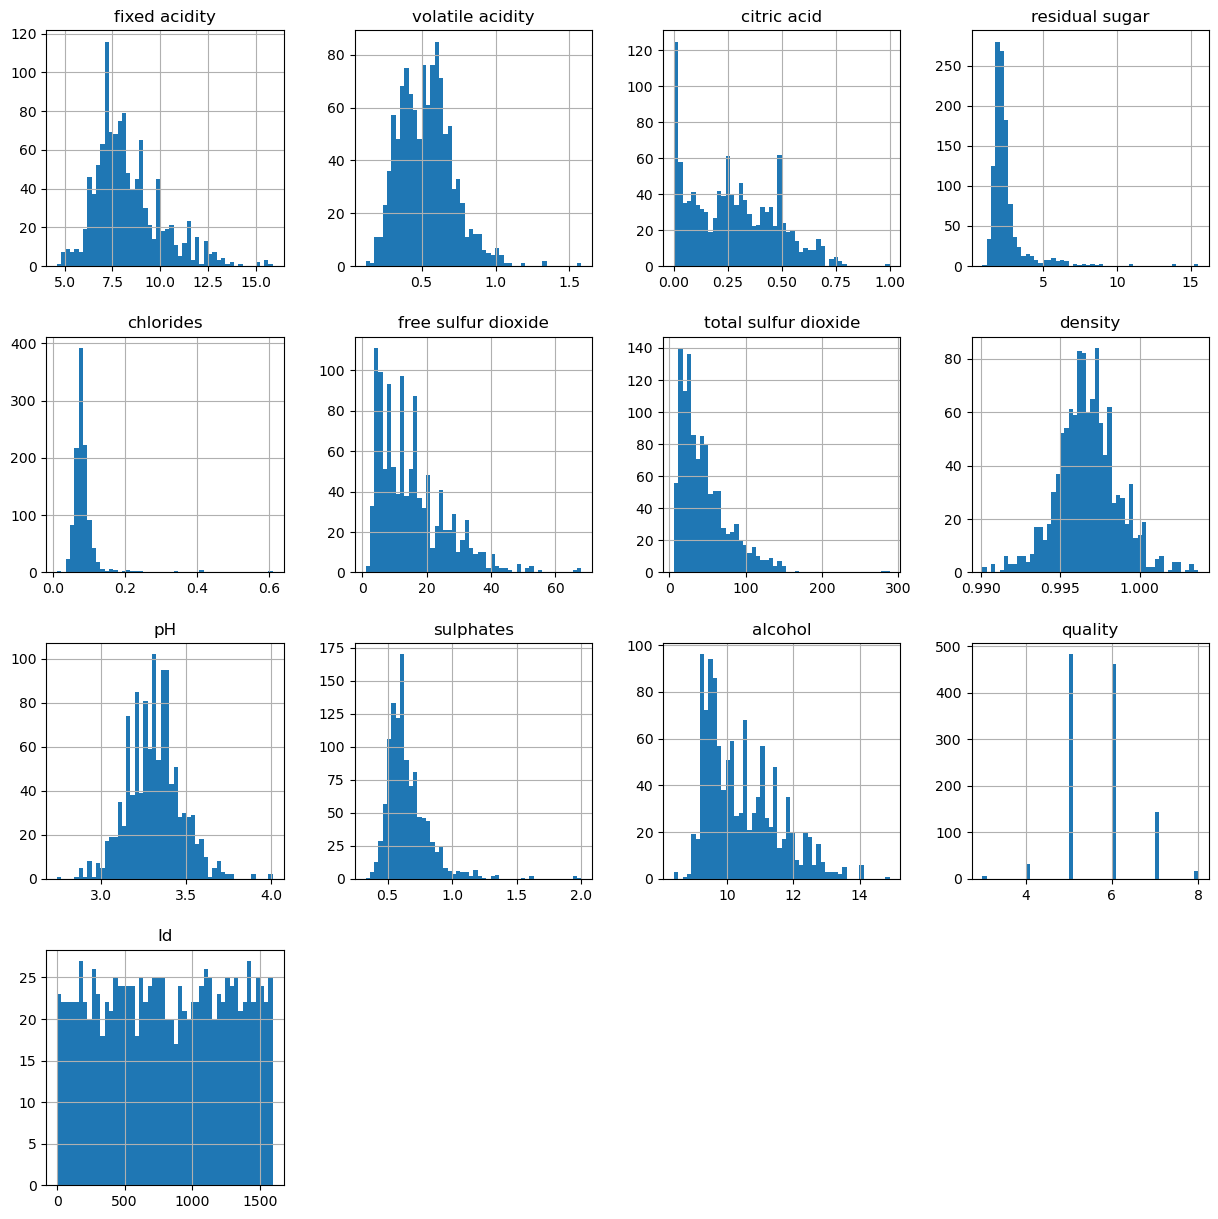

In [9]:
wine.hist(bins=50,figsize=(15,15)) #printing histogram.

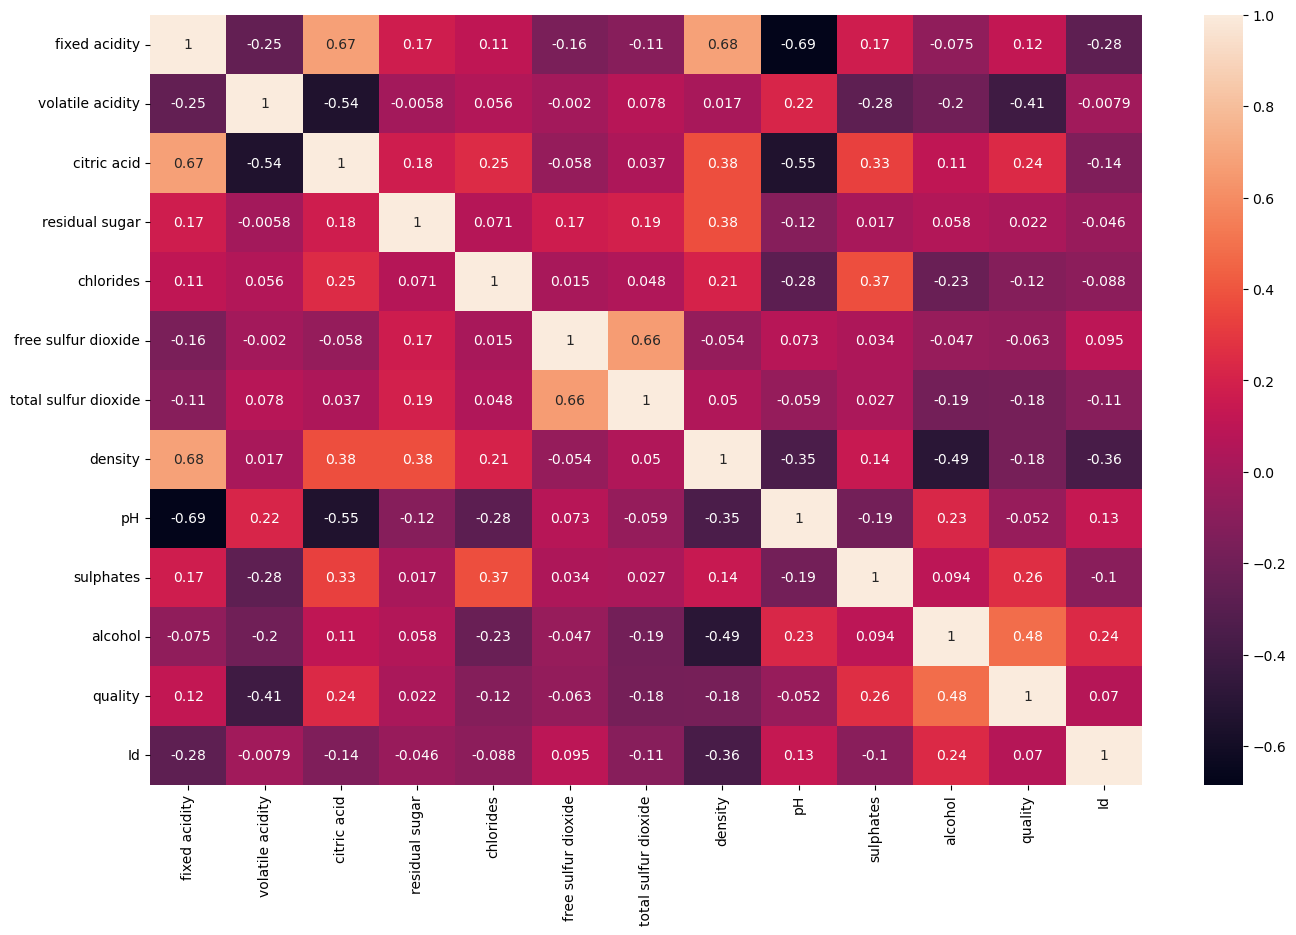

In [10]:
# Heatmap for correlation matrix.
plt.figure(figsize=(16,10))
sns.heatmap(wine.corr(),annot=True);

## 2. Splitting Feature and Target

In [11]:
# Splitting target feature and label.
Y=wine["quality"]
X=wine.loc[:,wine.columns!='quality']

In [12]:
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [13]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4


## 3. Finding Correlations


In [14]:
# Checking for correlations.
corr_matrix=wine.corr()

In [15]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

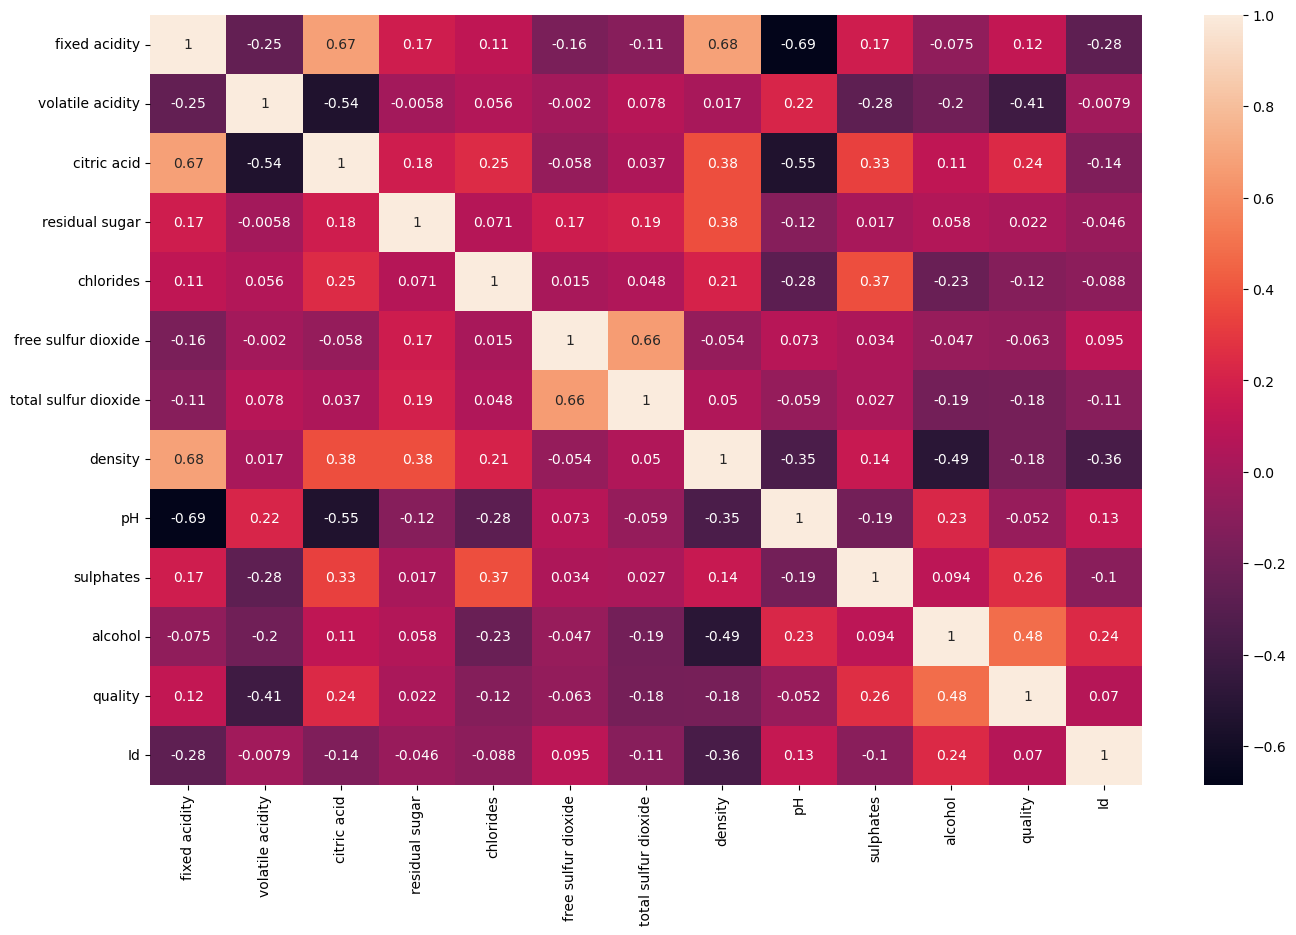

In [16]:
# Heatmap for correlation matrix.
plt.figure(figsize=(16,10))
sns.heatmap(wine.corr(),annot=True);

## 4.Feature Scaling


We calculate the Mutual information scores of our features with respect to the target. 

*Mutual information measures the similarity between each of the features and the target variable.*

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=False)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train, Y_train)

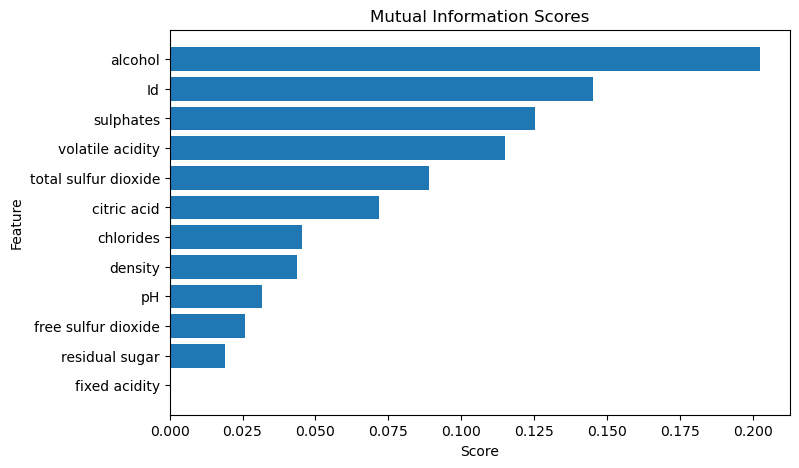

In [19]:
def plot_utility_scores(scores):
    y = scores.sort_values(ascending=True)
    width = np.arange(len(y))
    ticks = list(y.index)
    plt.barh(width, y)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plt.xlabel("Score")
plt.ylabel("Feature")
plot_utility_scores(mi_scores)

From the above graph we can clearly visualize that the feature ***Alcohol*** is having greatest mutual information score.

In [20]:
wine.drop(['free sulfur dioxide',"residual sugar","pH","Id","volatile acidity","density","total sulfur dioxide"],axis=1,inplace=True)
#dropping columns = ["free sulfur dioxide","residual sugar","pH","fixed acidity","density"] because they have less MI Score.
X=wine[['fixed acidity', 'citric acid', 'chlorides', 'sulphates', 'alcohol']]
Y=wine['quality']


In [21]:
wine

,fixed acidity,citric acid,chlorides,sulphates,alcohol,quality
0,7.4,0.00,0.076,0.56,9.4,5
1,7.8,0.00,0.098,0.68,9.8,5
2,7.8,0.04,0.092,0.65,9.8,5
3,11.2,0.56,0.075,0.58,9.8,6
4,7.4,0.00,0.076,0.56,9.4,5
...,...,...,...,...,...,...
1138,6.3,0.13,0.076,0.75,11.0,6
1139,6.8,0.08,0.068,0.82,9.5,6
1140,6.2,0.08,0.090,0.58,10.5,5
1141,5.9,0.10,0.062,0.76,11.2,6


In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=982)
#Splitting the dataset into test and train set.

## 5.Scaling and Normalizing Data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc_x=StandardScaler()

In [25]:
X_train=sc_x.fit_transform(X_train)

In [26]:
X_test=sc_x.transform(X_test)

In [27]:
X_train

array([[ 0.04934506, -0.97295834,  0.44504968, -0.79476716,  0.55499774],
       [ 0.92014025,  0.93429774, -0.3494211 , -0.19887801, -0.93837436],
       [-0.7053441 , -1.33379057, -0.20922038, -0.37764475, -0.56503134],
       ...,
       [ 1.50067037,  1.29512998,  1.07595295,  0.69495573,  1.02167652],
       [-0.76339711, -0.86986342, -0.3494211 , -0.25846692, -1.12504587],
       [ 1.09429928,  1.55286729, -0.37278789, -0.13928909, -0.75170285]])

In [28]:
X_test

array([[ 0.16545109, -0.81831596, -0.04565286, -1.03312282, -0.47169558],
       [ 0.33961012, -0.14819895,  0.18801502, -0.73517825, -1.12504587],
       [-0.41507904, -0.81831596, -0.1624868 , -0.49682258, -0.37835982],
       ...,
       [-0.64729109,  0.00644343, -0.04565286,  0.33742223,  0.55499774],
       [ 1.26845832,  2.01679444,  0.70208435,  0.5757779 ,  1.20834804],
       [ 0.28155711,  0.36727567,  0.0244475 , -0.25846692, -0.8450386 ]])

## 6.Applying Linear Regression model and performing predictions

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train,Y_train)
#Fitting the model

LinearRegression()

In [32]:
print(lm.intercept_)

5.62875


In [1]:
#Performing predictions
pred_train = lm.predict(X_train)

NameError: name 'lm' is not defined

In [34]:
pred_test = lm.predict(X_test)

In [37]:
Y_pred = lm.predict(X_test) 

## 7.Finding accuracy using R2 score and evaluating model

In [39]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_pred), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, Y_pred), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, Y_pred), 3)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, Y_pred), 3)) 
print("Accuracy score =", round(sm.r2_score(Y_test, Y_pred), 3))
#982

Mean absolute error = 0.53
Mean squared error = 0.447
Median absolute error = 0.404
Explain variance score = 0.345
Accuracy score = 0.34


## 8.Model Deployment


In [41]:
#Taking new user input for prediction
newInput= pd.DataFrame({
    'alcohol':[9.8],
    'volatile acidity':[0.76],
    'citric acid':[0.04],
    'sulphates':[0.65],
    'chlorides':[0.092]
    
})
predicted_quality=lm.predict(newInput)
print("Predicted quality is:", predicted_quality)

Predicted quality is: [6.14295911]


C:\Users\KIIT\New folder\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
